# Fourier Shell Correlation II: Static FSC

In order to start from a simple case, I will calculate the Fourier Shell Correlation for a single 3D image here. Let's start by loading some data (a tubulin image from the SuperTomo paper).

In [6]:
%matplotlib inline
from ipywidgets import interact, fixed

import os
import supertomo.ui.frc_options as options
from supertomo.ui.plots.image import display_2d_image
from supertomo.data.io import read
import supertomo.processing.image as imops
from supertomo.analysis.resolution.fourier_shell_correlation import DirectionalFSC

def show_axial_slice(image, slice):
    display_2d_image(image[slice])

In [7]:
# Image
data_dir = os.path.join(os.getcwd(), "data")
image_name = "40x_TAGoff_z_galvo.nd2"

# Get script options
args_list = [data_dir, '--bin-delta=20', '--normalize-power', '--frc-curve-fit-degree=4', 
            '--resolution-threshold-criterion=fixed', '--resolution-threshold-value=0.5',
            '--angle-delta=15', '--enable-hollow-iterator', '--extract-angle-delta=.3', 
             '--resolution-point-sigma=0.01']
args = options.get_frc_script_options(args_list)

# Get image
image = read.get_image(os.path.join(data_dir, image_name), channel=0)

# Pre-process
image = imops.zoom_to_isotropic_spacing(image, order=0)
image = imops.zero_pad_to_cube(image)
image = imops.crop_to_shape(image, [500]*3)

image1, image2 = imops.checkerboard_split(image)

interact(show_axial_slice, image=fixed(image1), slice=(0, image1.shape[0]-1))

The zoom is [3.2154696132596685, 1.0, 1.0]


interactive(children=(IntSlider(value=124, description=u'slice', max=249), Output()), _dom_classes=('widget-interact',))

<function __main__.show_axial_slice>

In [8]:
fsc_task = DirectionalFSC(image1, image2, args)

result = fsc_task.execute()

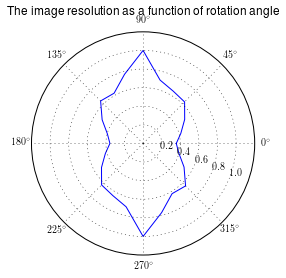

In [9]:
import supertomo.ui.plots.frc as frcplots

plotter = frcplots.FourierDataPlotter(result)
plotter.plot_polar()

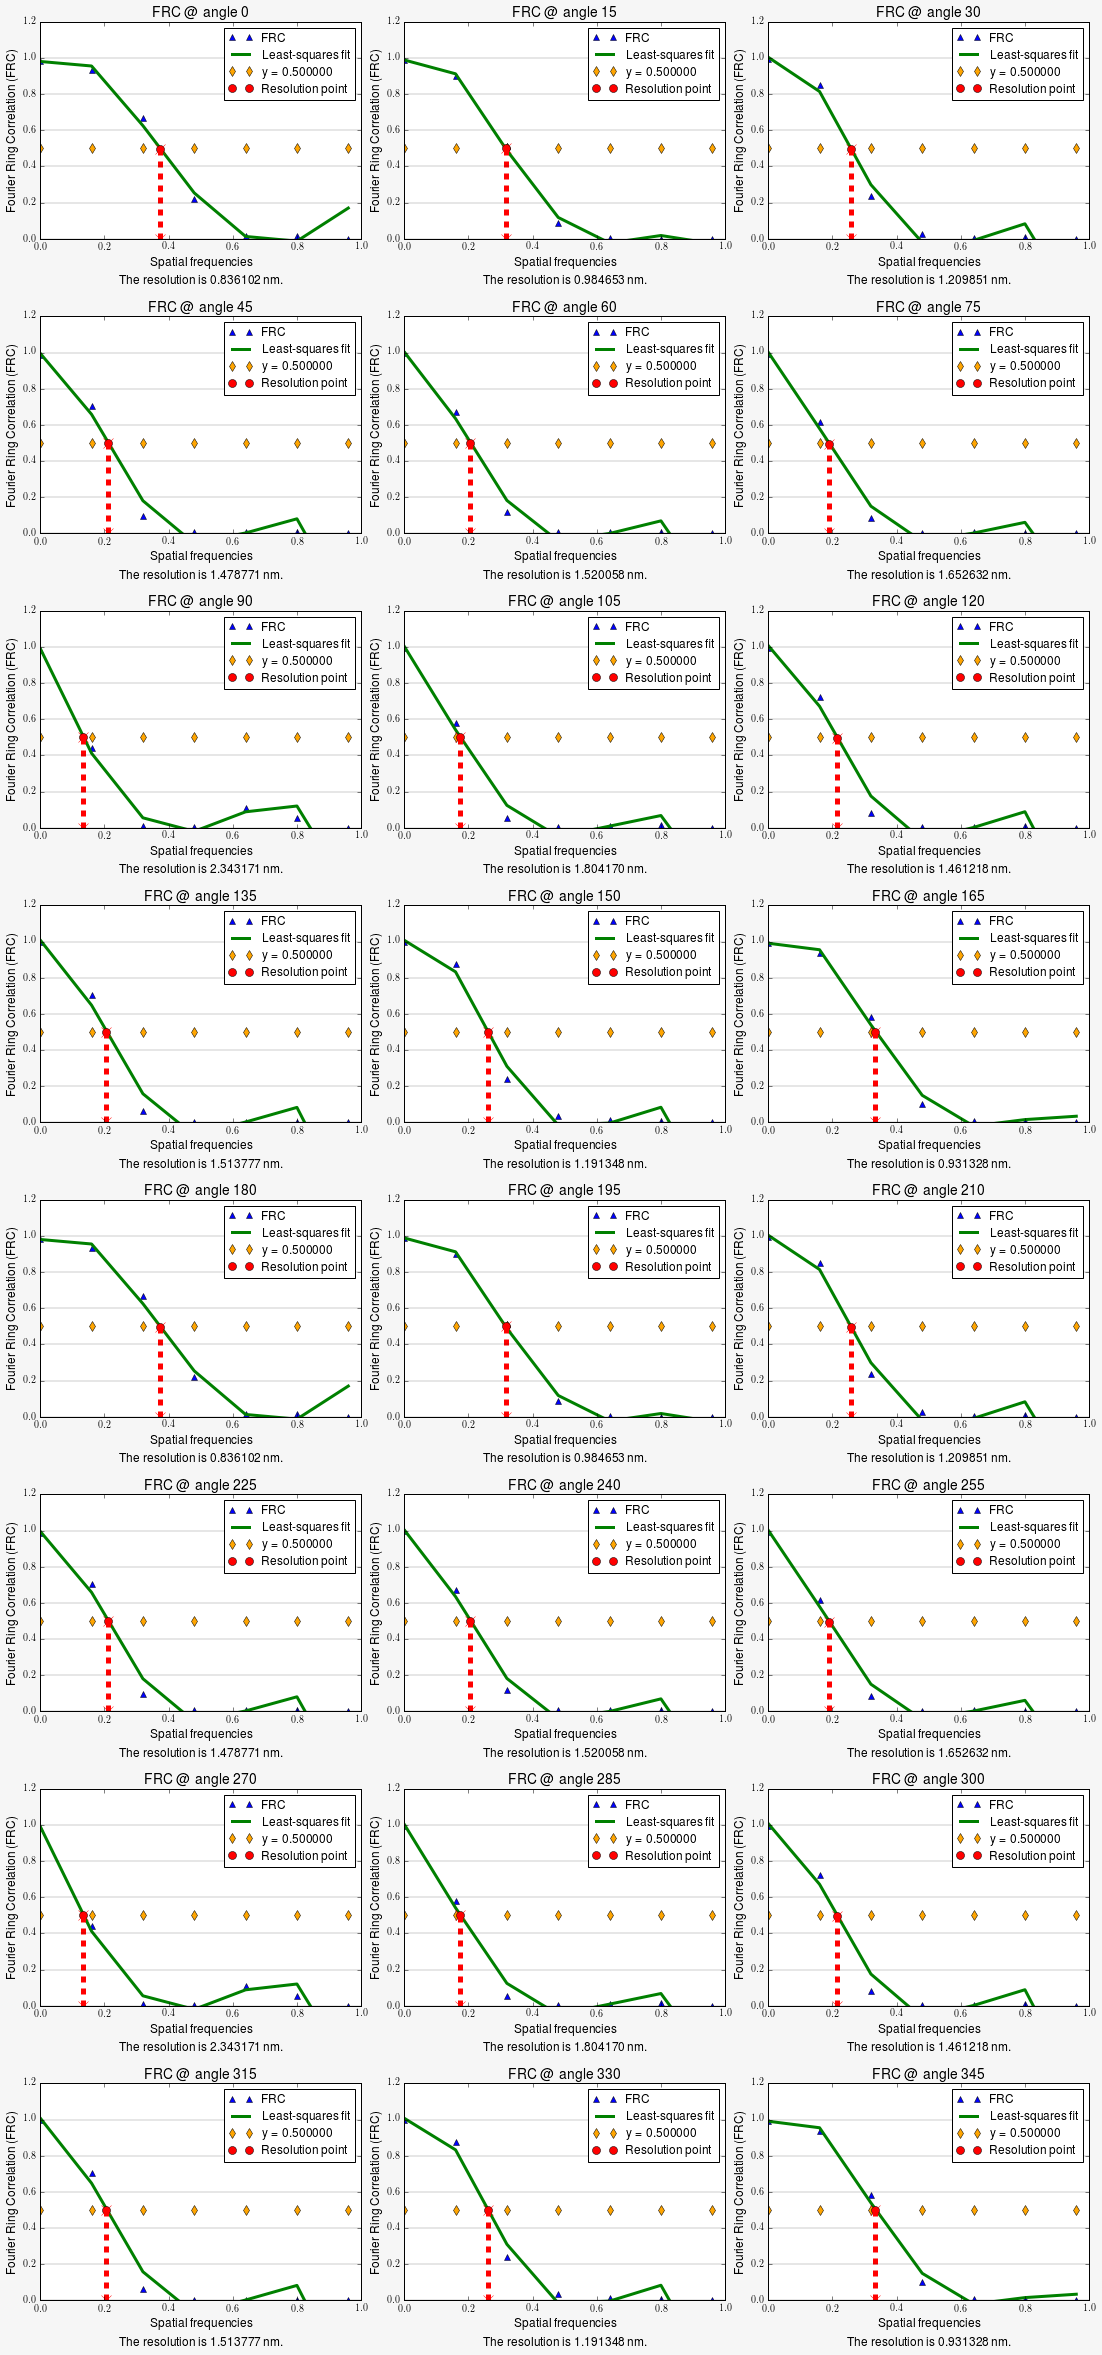

In [10]:
plotter.plot_all()